In [1]:
import pandas as pd

import matplotlib.pyplot as plt


Version 2 du script, on mets les fichiers par couples dans un repertoire.
Fichiers téléphone et arduino.


In [2]:
df = pd.read_csv('/home/paul/Arduino/Data/couples/20240303/005/arduino_16G.txt', sep='\t')
df.plot(x="time", y=["ax", "ay", "az"])

<Axes: xlabel='time'>

In [3]:
df.describe()

counter          time            ax            ay            az
count  10823.000000  10823.000000  10823.000000  10823.000000  10823.000000
mean    5411.000000  23500.901506      0.000724      0.000736      0.998208
std     3124.475316  11283.031615      0.028333      0.072922      0.026522
min        0.000000   4070.000000     -0.606740     -0.492000      0.215340
25%     2705.500000  13698.000000     -0.002740     -0.003230      0.994640
50%     5411.000000  23506.000000      0.000680      0.000190      0.999030
75%     8116.500000  33272.500000      0.004590      0.003610      1.002940
max    10822.000000  43074.000000      0.424510      0.755560      1.535650

counter
time
ax
ay
az


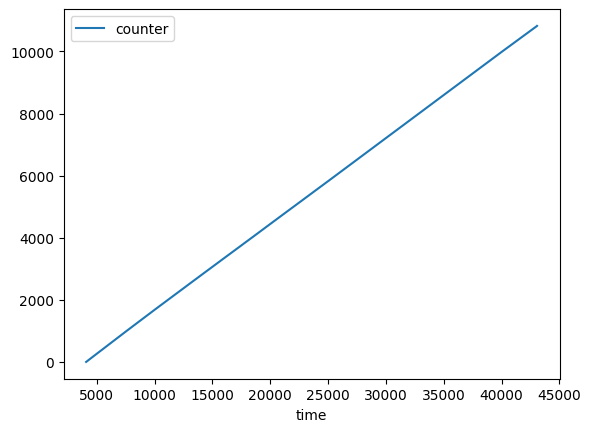

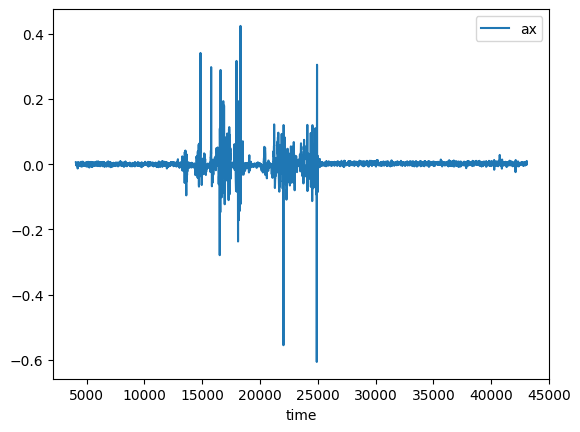

In [4]:
# iterating the columns
for col in df.columns:
    print(col)
    if col != "time":
        df.plot(x="time", y=col)

In [5]:
df["speed"] = df["ax"]**2 + df["ay"]**2 + df["az"]**2 

In [6]:
df.plot(x="time", y="speed")


<Axes: xlabel='time'>

In [7]:
df["ay_bis"] = df["ay"] * 6.66


In [8]:
ax = df[(df["time"] > 10000) & (df["time"]<27000)].plot(x="time", y="ay_bis")

# On mets les 2 courbes sur le même graph

cela necessite un peu de cuisine ...

<Axes: xlabel='time_bis'>

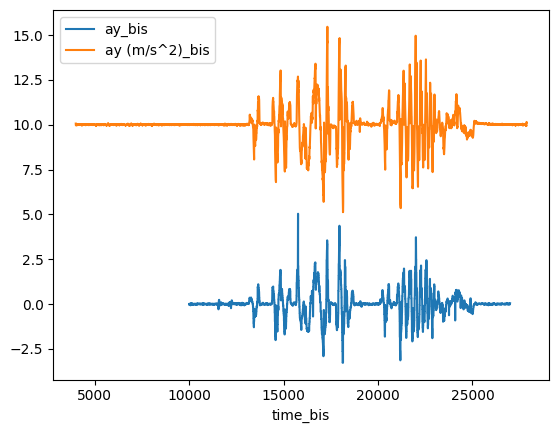

In [9]:
df_phone = pd.read_csv('/home/paul/Arduino/Data/couples/20240303/005/2024-03-0321.07.49.csv', sep=';', decimal=",")
df_phone["time_bis"] = df_phone["time"] * 1000+4000
df_phone["ay (m/s^2)_bis"] = df_phone["ay (m/s^2)"] +10
ax = df[(df["time"] > 10000) & (df["time"]<27000)].plot(x="time", y="ay_bis")
df_phone.plot(ax=ax, x="time_bis", y="ay (m/s^2)_bis")

In [10]:
df[(df["time"] > 10000) & (df["time"]<27000)].plot(x="time", y="ay")

<Axes: xlabel='time'>

# On travaille sur les moyennes mobiles
On enleve le bruit

<Axes: xlabel='time'>

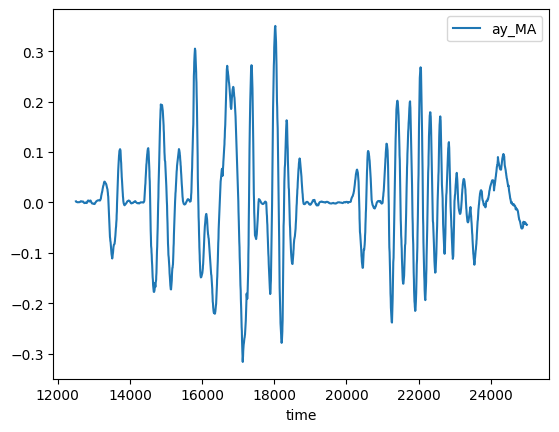

In [11]:
# Arduino 
df["ay_MA"] = df['ay'].rolling(30).mean()

df[(df["time"] > 12500) & (df["time"]< 25000)].plot(x="time", y ="ay_MA")

<Axes: xlabel='time'>

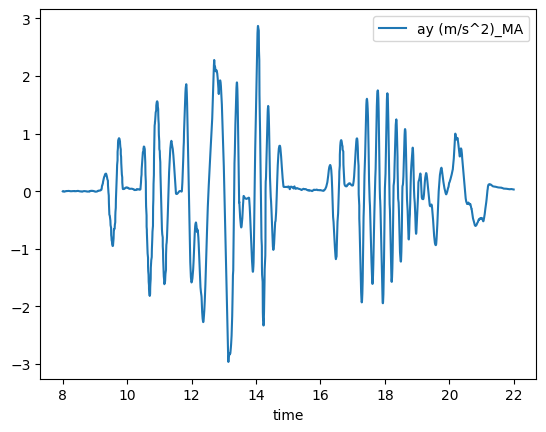

In [12]:
# Téléphone 
df_phone["ay (m/s^2)_MA"] = df_phone["ay (m/s^2)"].rolling(30).mean()

df_phone[(df_phone["time"] > 8) & (df_phone["time"]< 22)].plot(x="time", y ="ay (m/s^2)_MA")
# 

In [13]:
print("toto est bo");


toto est bo


In [14]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            5047 non-null   float64
 1   ax (m/s^2)      5047 non-null   float64
 2   ay (m/s^2)      5047 non-null   float64
 3   az (m/s^2)      5047 non-null   float64
 4   aT (m/s^2)      5047 non-null   float64
 5   time_bis        5047 non-null   float64
 6   ay (m/s^2)_bis  5047 non-null   float64
 7   ay (m/s^2)_MA   5018 non-null   float64
dtypes: float64(8)
memory usage: 315.6 KB
